<a href="https://colab.research.google.com/github/nguyetmle/voting-distortion/blob/main/Voting_Distortion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [8]:
#read the output file
df = pd.read_csv("output3D.csv")
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      4800 non-null   int64  
 1   n                          4800 non-null   int64  
 2   m                          4800 non-null   int64  
 3   Dimension                  4800 non-null   object 
 4   Distribution               4800 non-null   object 
 5   OPT                        4800 non-null   object 
 6   Plurality                  4800 non-null   object 
 7   Plurality Distortion       4800 non-null   float64
 8   Copeland                   4800 non-null   object 
 9   Copeland Distortion        4800 non-null   float64
 10  STV                        4800 non-null   object 
 11  STV Distortion             4800 non-null   object 
 12  Borda                      4800 non-null   object 
 13  Borda Distortion           4800 non-null   float

In [9]:
#make sure all distortion columns are numeric
df.loc[df["STAR Distortion"] == "False", "STAR Distortion"] = np.nan
df.loc[df["STV Distortion"] == "False", "STV Distortion"] = np.nan
df["STAR Distortion"] = pd.to_numeric(df["STAR Distortion"], errors="coerce")
df["STV Distortion"] = pd.to_numeric(df["STV Distortion"], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      4800 non-null   int64  
 1   n                          4800 non-null   int64  
 2   m                          4800 non-null   int64  
 3   Dimension                  4800 non-null   object 
 4   Distribution               4800 non-null   object 
 5   OPT                        4800 non-null   object 
 6   Plurality                  4800 non-null   object 
 7   Plurality Distortion       4800 non-null   float64
 8   Copeland                   4800 non-null   object 
 9   Copeland Distortion        4800 non-null   float64
 10  STV                        4800 non-null   object 
 11  STV Distortion             3689 non-null   float64
 12  Borda                      4800 non-null   object 
 13  Borda Distortion           4800 non-null   float

In [10]:
df.head()

,index,n,m,Dimension,Distribution,OPT,Plurality,Plurality Distortion,Copeland,Copeland Distortion,STV,STV Distortion,Borda,Borda Distortion,STAR,STAR Distortion,Plurality Veto,Plurality Veto Distortion
0,0,200,5,3D,normal,Candidate 2,Candidate 3,0.972022,Candidate 2,0.846461,Candidate 2,0.846461,Candidate 2,0.846461,Candidate 1,0.738120,Candidate 2,0.846461
1,1,200,5,3D,normal,Candidate 2,Candidate 3,0.893111,Candidate 2,0.792764,Candidate 2,0.792764,Candidate 2,0.792764,Candidate 0,0.780600,Candidate 2,0.792764
2,2,200,5,3D,normal,Candidate 4,Candidate 2,0.813714,Candidate 2,0.813714,Candidate 2,0.813714,Candidate 4,0.839592,Candidate 2,0.813714,Candidate 2,0.813714
3,3,200,5,3D,normal,Candidate 4,Candidate 4,0.808764,Candidate 4,0.808764,Candidate 4,0.808764,Candidate 4,0.808764,Candidate 3,0.793286,Candidate 4,0.808764
4,4,200,5,3D,normal,Candidate 0,Candidate 0,0.783088,Candidate 0,0.783088,Candidate 0,0.783088,Candidate 0,0.783088,Candidate 0,0.783088,Candidate 0,0.783088


In [16]:
#group by distribution, n, m
group_by_all = df.groupby(["Distribution", "n", "m"]).agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))

In [34]:
group_by_all

Plurality_Distortion_avg  Plurality_Distortion_max  \
Distribution n   m                                                         
bimodal      200 5                    0.878276                  1.215597   
                 10                   0.891715                  1.192374   
                 50                   0.931761                  1.313071   
                 100                  0.952663                  1.273901   
normal       200 5                    0.794220                  1.055073   
                 10                   0.838464                  1.152475   
                 50                   0.937845                  1.422967   
                 100                  0.994977                  1.558469   
poisson      200 5                    0.803247                  1.108943   
                 10                   0.822621                  1.265929   
                 50                   0.932820                  1.404230   
                 100                  0.975545                  1.612932   
uniform      200 5                    0.806451                  1.145350   
                 10                   0.852619                  1.214639   
                 50                   0.992859                  1.370654   
                 100                  1.022131                  1.380957   

                      Copeland_Distortion_avg  Copeland_Distortion_max  \
Distribution n   m                                                       
bimodal      200 5                   0.829573                 1.102738   
                 10                  0.821798                 1.035831   
                 50                  0.816491                 0.979350   
                 100                 0.812653                 0.925808   
normal       200 5                   0.781152                 0.890463   
                 10                  0.784527                 0.862305   
                 50                  0.786852                 0.851798   
                 100                 0.786101                 0.842659   
poisson      200 5                   0.791554                 0.937795   
                 10                  0.784111                 0.858215   
                 50                  0.785769                 0.835411   
                 100                 0.785816                 0.834948   
uniform      200 5                   0.785600                 0.920979   
                 10                  0.791068                 0.883017   
                 50                  0.796705                 0.851340   
                 100                 0.796266                 0.840399   

                      STV_Distortion_avg  STV_Distortion_max  \
Distribution n   m                                             
bimodal      200 5              0.820062            0.920003   
                 10             0.846295            0.921678   
                 50             0.879388            1.027383   
                 100            0.910586            1.029891   
normal       200 5              0.784001            0.918120   
                 10             0.795018            0.959746   
                 50             0.836034            1.052304   
                 100            0.842231            1.056522   
poisson      200 5              0.794215            0.935083   
                 10             0.790853            0.950166   
                 50             0.830905            1.023763   
                 100            0.843912            1.054789   
uniform      200 5              0.788403            1.016130   
                 10             0.801903            0.966603   
                 50             0.864007            1.123697   
                 100            0.871040            1.091632   

                      Borda_Distortion_avg  Borda_Distortion_max  \
Distribution n   m                                                 
bimodal      200 5             

In [18]:
group_by_distribution  = df.groupby("Distribution").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))

In [35]:
group_by_distribution

,Plurality_Distortion_avg,Plurality_Distortion_max,Copeland_Distortion_avg,Copeland_Distortion_max,STV_Distortion_avg,STV_Distortion_max,Borda_Distortion_avg,Borda_Distortion_max,STAR_Distortion_avg,STAR_Distortion_max,PluralityVeto_Distortion_avg,PluralityVeto_Distortion_max
Distribution,,,,,,,,,,,,
bimodal,0.913604,1.313071,0.820129,1.102738,0.855991,1.029891,0.834881,1.090185,0.790176,0.908803,0.821507,1.102738
normal,0.891377,1.558469,0.784658,0.890463,0.814120,1.056522,0.785400,0.914877,0.769168,0.873320,0.791322,0.899365
poisson,0.883558,1.612932,0.786812,0.937795,0.814798,1.054789,0.787238,0.899604,0.772288,0.878648,0.791720,0.909960
uniform,0.918515,1.380957,0.792410,0.920979,0.831048,1.123697,0.793339,0.958637,0.769914,0.875829,0.800938,0.995242


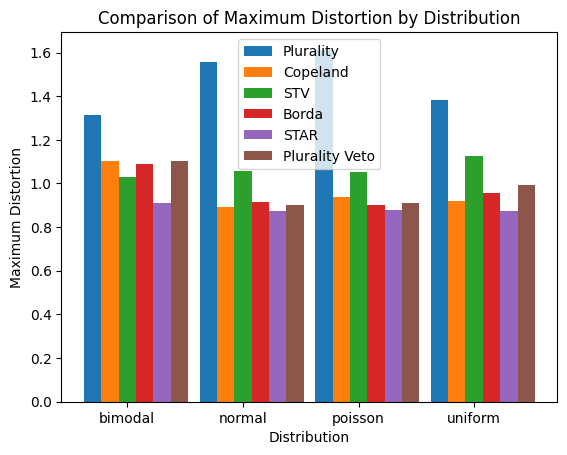

In [20]:

# Extract the data
distribution = group_by_distribution.index
plurality_max = group_by_distribution["Plurality_Distortion_max"]
copeland_max = group_by_distribution["Copeland_Distortion_max"]
stv_max = group_by_distribution["STV_Distortion_max"]
borda_max = group_by_distribution["Borda_Distortion_max"]
star_max = group_by_distribution["STAR_Distortion_max"]
pluralityVeto_max = group_by_distribution["PluralityVeto_Distortion_max"]

# Set the width of each bar
bar_width = 0.15

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_max, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_max, width=bar_width, label="Copeland")
plt.bar(x, stv_max, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_max, width=bar_width, label="Borda")
plt.bar(x + 2 * bar_width, star_max, width=bar_width, label="STAR")
plt.bar(x + 3 * bar_width, pluralityVeto_max, width=bar_width, label="Plurality Veto")

# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Maximum Distortion")
plt.title("Comparison of Maximum Distortion by Distribution")
plt.xticks(x, distribution)
plt.legend()

# Show the plot
plt.show()



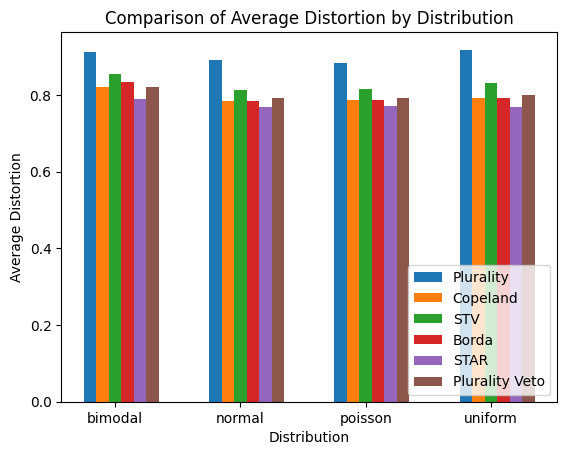

In [37]:
# Extract the data
distribution = group_by_distribution.index
plurality_avg = group_by_distribution["Plurality_Distortion_avg"]
copeland_avg = group_by_distribution["Copeland_Distortion_avg"]
stv_avg = group_by_distribution["STV_Distortion_avg"]
borda_avg = group_by_distribution["Borda_Distortion_avg"]
star_avg = group_by_distribution["STAR_Distortion_avg"]
pluralityVeto_avg = group_by_distribution["PluralityVeto_Distortion_avg"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_avg, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_avg, width=bar_width, label="Copeland")
plt.bar(x, stv_avg, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_avg, width=bar_width, label="Borda")
plt.bar(x + 2 * bar_width, star_avg, width=bar_width, label="STAR")
plt.bar(x + 3 * bar_width, pluralityVeto_avg, width=bar_width, label="Plurality Veto")

# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Average Distortion")
plt.title("Comparison of Average Distortion by Distribution")
plt.xticks(x, distribution)
plt.legend(loc='lower right')


In [38]:
group_by_m = df.groupby("m").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))
group_by_m

,Plurality_Distortion_avg,Plurality_Distortion_max,Copeland_Distortion_avg,Copeland_Distortion_max,STV_Distortion_avg,STV_Distortion_max,Borda_Distortion_avg,Borda_Distortion_max,STAR_Distortion_avg,STAR_Distortion_max,PluralityVeto_Distortion_avg,PluralityVeto_Distortion_max
m,,,,,,,,,,,,
5,0.820548,1.215597,0.796970,1.102738,0.790910,1.016130,0.798201,1.090185,0.767490,0.908803,0.797017,1.102738
10,0.851355,1.265929,0.795376,1.035831,0.797665,0.966603,0.800057,1.031143,0.767464,0.880925,0.799313,1.035831
50,0.948821,1.422967,0.796454,0.979350,0.844633,1.123697,0.801125,0.919053,0.781494,0.836611,0.804176,0.995242
100,0.986329,1.612932,0.795209,0.925808,0.854751,1.091632,0.801475,0.948247,0.785692,0.853086,0.804980,0.943904


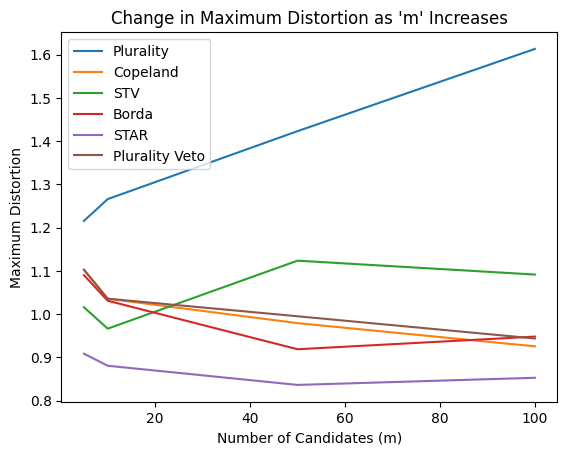

In [39]:
plt.plot(group_by_m.index, group_by_m["Plurality_Distortion_max"], label="Plurality")
plt.plot(group_by_m.index, group_by_m["Copeland_Distortion_max"], label="Copeland")
plt.plot(group_by_m.index, group_by_m["STV_Distortion_max"], label="STV")
plt.plot(group_by_m.index, group_by_m["Borda_Distortion_max"], label="Borda")
plt.plot(group_by_m.index, group_by_m["STAR_Distortion_max"], label="STAR")
plt.plot(group_by_m.index, group_by_m["PluralityVeto_Distortion_max"], label="Plurality Veto")

# Customize the plot
plt.xlabel("Number of Candidates (m)")
plt.ylabel("Maximum Distortion")
plt.title("Change in Maximum Distortion as 'm' Increases")
plt.legend()


# Show the plot
plt.show()

In [38]:
group_by_n = df.groupby("n").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"))
group_by_n

,Plurality_Distortion_avg,Plurality_Distortion_max,Copeland_Distortion_avg,Copeland_Distortion_max,STV_Distortion_avg,STV_Distortion_max,Borda_Distortion_avg,Borda_Distortion_max,STAR_Distortion_avg,STAR_Distortion_max
n,,,,,,,,,,
200,1.178425,2.100644,1.003883,1.230713,1.059872,1.358281,1.013893,1.311625,1.004066,1.158441


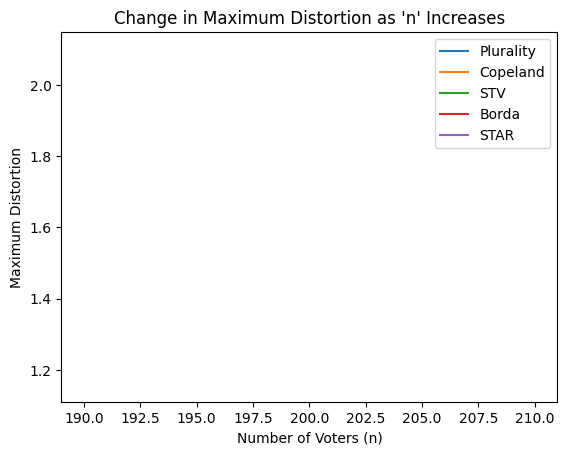

In [39]:
# plt.plot(group_by_n.index, group_by_n["Plurality_Distortion_max"], label="Plurality")
# plt.plot(group_by_n.index, group_by_n["Copeland_Distortion_max"], label="Copeland")
# plt.plot(group_by_n.index, group_by_n["STV_Distortion_max"], label="STV")
# plt.plot(group_by_n.index, group_by_n["Borda_Distortion_max"], label="Borda")
# plt.plot(group_by_n.index, group_by_n["STAR_Distortion_max"], label="STAR")

# # Customize the plot
# plt.xlabel("Number of Voters (n)")
# plt.ylabel("Maximum Distortion")
# plt.title("Change in Maximum Distortion as 'n' Increases")
# plt.legend()


# # Show the plot
# plt.show()

In [46]:
# Define the target value
target_value = 1

# Group by 'Distribution' and calculate the percentage of each methods choosing the OPT
accuracy_by_distribution = df.groupby('Distribution').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100)

).reset_index()

In [48]:
accuracy_by_distribution

,Distribution,Plurality_percentage,Copeland_percentage,STV_percentage,STAR_percentage,Borda_percentage
0,bimodal,0.0,0.0,0.0,0.0,0.0
1,normal,0.0,0.0,0.0,0.0,0.0
2,poisson,0.0,0.0,0.0,0.0,0.0
3,uniform,0.0,0.0,0.0,0.0,0.0


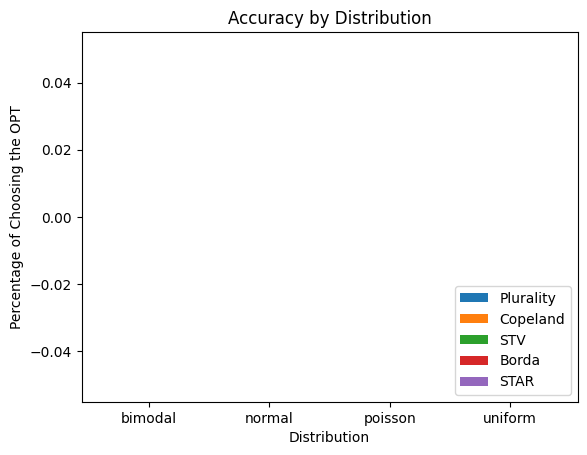

In [53]:
# Extract the data
distribution = accuracy_by_distribution["Distribution"]

# Set the width of each bar
bar_width = 0.15

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, accuracy_by_distribution["Plurality_percentage"], width=bar_width, label="Plurality")
plt.bar(x - bar_width, accuracy_by_distribution["Copeland_percentage"], width=bar_width, label="Copeland")
plt.bar(x, accuracy_by_distribution["STV_percentage"], width=bar_width, label="STV")
plt.bar(x + bar_width, accuracy_by_distribution["Borda_percentage"], width=bar_width, label="Borda")
plt.bar(x + 2 * bar_width, accuracy_by_distribution["STAR_percentage"], width=bar_width, label="STAR")

# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Percentage of Choosing the OPT")
plt.title("Accuracy by Distribution")
plt.xticks(x, distribution)
plt.legend(loc='lower right')


In [51]:
# Define the target value
target_value = 1

# Group by 'Distribution' and calculate the percentage of each methods choosing the OPT
accuracy_by_m = df.groupby('m').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100)
)
accuracy_by_m

,Plurality_percentage,Copeland_percentage,STV_percentage,STAR_percentage,Borda_percentage
m,,,,,
5,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0
50,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0


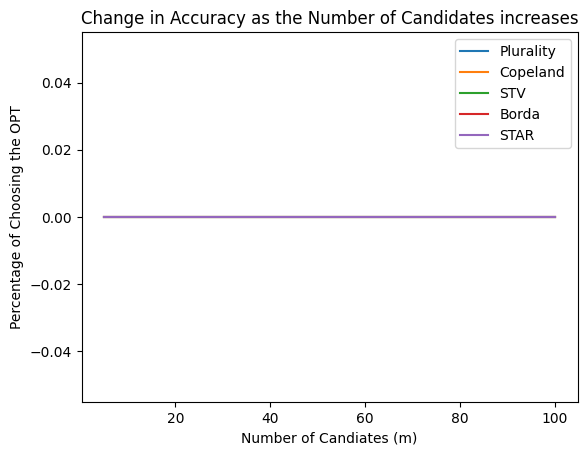

In [52]:
plt.plot(accuracy_by_m.index, accuracy_by_m["Plurality_percentage"], label="Plurality")
plt.plot(accuracy_by_m.index, accuracy_by_m["Copeland_percentage"], label="Copeland")
plt.plot(accuracy_by_m.index, accuracy_by_m["STV_percentage"], label="STV")
plt.plot(accuracy_by_m.index, accuracy_by_m["Borda_percentage"], label="Borda")
plt.plot(accuracy_by_m.index, accuracy_by_m["STAR_percentage"], label="STAR")

# Customize the plot
plt.xlabel("Number of Candiates (m)")
plt.ylabel("Percentage of Choosing the OPT")
plt.title("Change in Accuracy as the Number of Candidates increases")
plt.legend()


# Show the plot
plt.show()